In [220]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from dateutil import parser
from datetime import datetime

In [221]:
df1 = pd.read_excel('O2D_delay_data.xlsx', 'logistics')
df2 = pd.read_excel('O2D_delay_data.xlsx', 'po_level')
# df2 = df2[df2['order_status'].str.lower() == 'completed']
# df2 = df2[['buyer_name', 'seller_name', 'seller_po_number', 'seller_po_status', 'transporter_type' , 'seller_po_creation_date', 'buyer_invoice_item_quantity', 'po_quantity', 'order_completion_percentage', 'o2d_']]
df1.head()

,sno,date,po_number,po_qty,seller_po_creation_date,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,dispatch_to_delivery_tat,unloading_tat,vehicle_level_o2d
0,1,2024-04-12,PO/25/MH/96,60.0,2024-04-12,RMC - Aluminium,29.709999,Raipur,Gandhinagar,April 2 Week,04-12-2024 19:20:32,4/12/2024 20:07:00,4/12/2024 20:07:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/13/2024 11:52:00,4/13/2024 23:59:59,4/13/2024 12:51:00,4/13/2024 15:57:00,4/13/2024 18:02:00,4/16/2024 9:55:00,4/16/2024 10:15:00,4/16/2024 13:30:00,0.032280,0.000012,0.656262,0.040984,0.215984,-0.464583,0.003484,2.661817,0.149317,0.945463
1,2,2024-04-10,PO/25/MH/73,300.0,2024-04-10,RMC - Steel,39.230000,Raipur,Jalna,April 3 Week,04/10/2024 18:53:40,4/12/2024 20:40:00,4/12/2024 20:40:00,4/12/2024 20:55:00,4/12/2024 21:40:00,4/13/2024 18:22:00,4/14/2024 23:59:59,4/14/2024 7:26:00,4/15/2024 14:10:00,4/15/2024 15:32:00,4/18/2024 9:00:00,4/18/2024 10:12:00,4/19/2024 10:45:00,2.073854,0.000012,0.904178,0.544456,1.337512,-0.690278,0.010428,2.727789,1.072928,4.859950
2,3,2024-04-10,PO/25/MH/73,300.0,2024-04-10,RMC - Steel,34.189999,Raipur,Jalna,April 3 Week,04/10/2024 18:53:40,4/12/2024 20:40:00,4/12/2024 20:40:00,4/12/2024 20:55:00,4/12/2024 21:40:00,4/13/2024 18:22:00,4/14/2024 23:59:59,4/14/2024 7:26:00,4/15/2024 16:37:00,4/15/2024 17:20:00,4/18/2024 12:00:00,4/18/2024 12:00:00,4/19/2024 11:30:00,2.073854,0.000012,0.904178,0.544456,1.412512,-0.690278,0.010428,2.777789,0.979178,4.934950
3,4,2024-04-12,PO/25/MH/96,60.0,2024-04-12,RMC - Aluminium,29.260000,Raipur,Gandhinagar,April 3 Week,04-12-2024 19:20:32,4/12/2024 20:07:00,4/14/2024 21:50:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/15/2024 11:55:00,4/15/2024 23:59:59,4/15/2024 13:30:00,4/15/2024 17:55:00,4/15/2024 19:30:00,4/17/2024 20:00:00,4/18/2024 15:20:00,4/18/2024 16:30:00,0.032280,2.071539,0.586817,0.065984,0.250012,-0.437500,0.003484,2.020845,0.854178,3.006570
4,5,2024-04-16,PO/25/HA/111,600.0,2024-04-16,RMC - Steel,25.129999,Durgapur,Sikendarabad,April 3 Week,04/16/2024 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,4/22/2024 11:00:00,4/19/2024 23:59:59,04/24/24 4:05:00,04/24/24 14:02:00,04/24/2024 22:15:00,4/26/2024 23:00:00,04/27/2024 16:15:00,04/28/2024 15:00:00,0.936412,0.000012,4.775706,1.711817,0.756956,4.170139,0.747928,2.031262,1.666678,8.180850


In [225]:
df2_selected_cols = df2[['buyer_name', 'seller_name', 'seller_po_number',
       'transporter_type', 'order_type',
       'order_completion_percentage', 'o2d_', 'O2D_Bucket']]
df = df1.merge(df2_selected_cols, left_on='po_number', right_on = 'seller_po_number', how = 'left')

# df['vehicle_unloaded_ts'] = pd.to_datetime(df['vehicle_unloaded_ts'], format='%m/%d/%y %H:%M:%S')
df = df.sort_values(by=['po_number', 'vehicle_unloaded_ts'])

# ## removing all the po which has NA in dispatched_qty
# dispatch_qty_na_po = set(df[df['dispatched_qty'].isna()]['po_number'].unique())
# print('Shape of df before filtering the po with NAN dispatch_qty')
# print(df.shape)
# df = df[~df['po_number'].isin(dispatch_qty_na_po)]
# print('Shape of df after filtering the po with NAN dispatch_qty')
print(df.shape)

## Renaming the category
df.loc[(df['category'] == 'RMX - Steel'), 'category'] = 'RMC - Steel'
df.loc[(df['transporter_type'] == 'Bizongo Non O2D'), 'transporter_type'] = 'Bizongo'

## Ranking the order of the transport
df['order'] = df.groupby('po_number')[['vehicle_reached_delivery_location_ts']].rank(method='first')
df = df[~df['po_number'].isin(['PO/25/MH/498','PO/25/MH/564', 'PO/25/MH/568'])]
df = df[~df['po_qty'].isna()]

## Route
df['route'] = df['origin'].str.lower() + '-' + df['destination'].str.lower()
df['lane_order'] = df.groupby('route')[['po_ts']].rank(method='min')
df.rename(columns = {'o2d_' : 'O2D_'}, inplace = True)

### Month wise
df['po_ts'] = df['po_ts'].astype(str)
def safe_parse(date_str):
    try:
        return parser.parse(date_str)
    except (ValueError, TypeError):
        return pd.NaT

df['po_ts'] = df['po_ts'].apply(safe_parse)
df['Month'] = df['po_ts'].dt.strftime('%B')


### Total rounds 

po_count = df['po_number'].value_counts().reset_index()
po_count.rename(columns = {'count' : 'total_rounds'}, inplace = True)
df = df.merge(po_count, on = 'po_number')

print(df.shape)

(163, 41)
(158, 46)


In [226]:
import pandas as pd
import numpy as np
from datetime import datetime

def convert_date_format(date_str):
    if pd.isna(date_str):
        return np.nan
    
    if isinstance(date_str, pd.Timestamp):
        return date_str
    
    if isinstance(date_str, str):
        # Remove AM/PM if present
        date_str = date_str.replace(" AM", "").replace(" PM", "")
        
        # Ensure there is a space between the date and time parts
        if ' ' not in date_str.split()[0]:
            date_str = date_str[:10] + ' ' + date_str[10:]
        
        # Remove any extra spaces before the time part
        date_str = date_str.strip()
        if ' :' in date_str:
            date_str = date_str.replace(' :', ' ')
        
        # Add seconds if not present in the input string
        if len(date_str.split(':')) == 2:
            date_str += ":00"
        
        # Remove leading zeros from month and day
        parts = date_str.split()
        date_part = parts[0].split('/')
        time_part = parts[1] if len(parts) > 1 else ""
        
        date_part = [str(int(part)) for part in date_part]
        date_str = '/'.join(date_part) + ' ' + time_part
        

        possible_formats = [
            "%Y-%m-%d %H:%M:%S",   # Format for "2024-04-19 23:59:59"
            "%m/%d/%y %H:%M:%S",
            "%m/%d/%Y %H:%M:%S",
            "%-m/%-d/%y %H:%M:%S",   # Single-digit month and day
            "%-m/%-d/%Y %H:%M:%S",   # Single-digit month and day
        ]
        
        for fmt in possible_formats:
            try:
                dt = datetime.strptime(date_str, fmt)
                return dt
            except ValueError:
                pass
    else:
        raise DateFormatError(f"Unable to parse date: {date_str}")

df['vehicle_dispatched_ts'] = df['vehicle_dispatched_ts'].apply(convert_date_format)
df['po_ts']
df['po_ts'] = df['po_ts'].apply(convert_date_format)
# df['expected_date_of_vehicle_reporting'] = df['expected_date_of_vehicle_reporting'].apply(convert_date_format)

df['nextbuy_vehicle_indent_ts'] = df['nextbuy_vehicle_indent_ts'].apply(convert_date_format)
df['transporter_order_indent_acceptance_ts'] = df['transporter_order_indent_acceptance_ts'].apply(convert_date_format)


# Explicitly convert columns to datetime
df['vehicle_dispatched_ts'] = pd.to_datetime(df['vehicle_dispatched_ts'], errors='coerce')
df['po_ts'] = pd.to_datetime(df['po_ts'], errors='coerce')
df['expected_date_of_vehicle_reporting'] = pd.to_datetime(df['expected_date_of_vehicle_reporting'], errors='coerce')

# Calculate the time difference in days
df['po_ts_to_dispatch'] = (df['vehicle_dispatched_ts'] - df['po_ts']).dt.total_seconds() / (3600 * 24)
df['po_ts_to_expected_reporting'] = (df['expected_date_of_vehicle_reporting'] - df['po_ts']).dt.total_seconds() / (3600 * 24)
df['vehicle_indent_to_accept_tat'] = (df['transporter_order_indent_acceptance_ts'] - df['nextbuy_vehicle_indent_ts']).dt.total_seconds() / (3600 * 24)



# Fill NaT with a far past date to handle ranking
# df['expected_date_of_vehicle_reporting'].fillna(pd.Timestamp('1970-01-01'), inplace=True)

# Rank the vehicles
df['order'] = df.groupby('po_number')['expected_date_of_vehicle_reporting'].rank(method='first')

/tmp/ipykernel_34448/2734470795.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_april_df[columns_to_scale] = scaler.fit_transform(non_april_df[columns_to_scale])


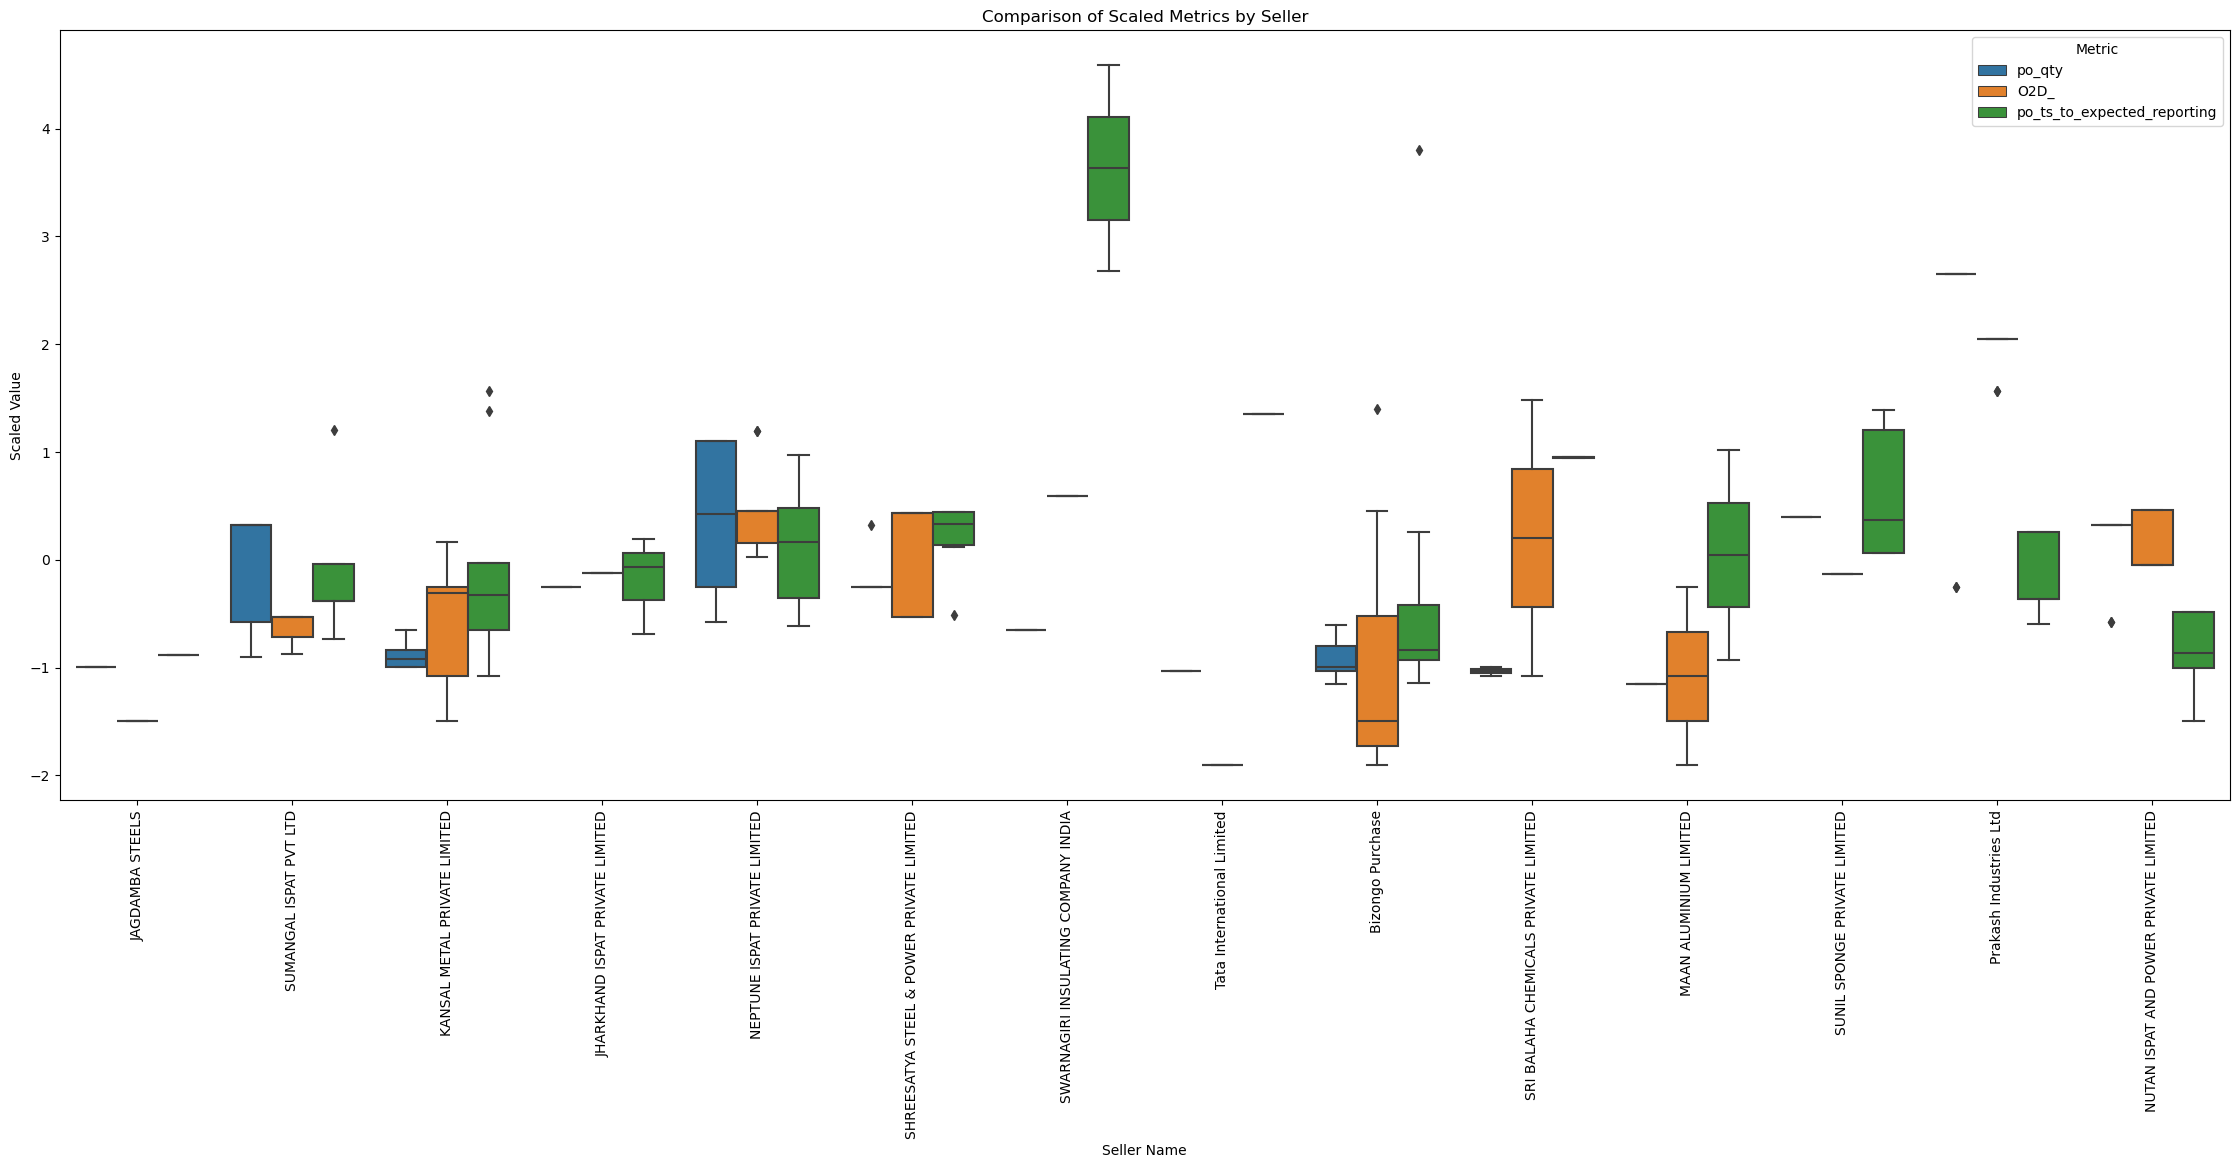

In [228]:
from sklearn.preprocessing import StandardScaler

non_april_df = df[df['Month'] != 'April']
columns_to_scale = ['po_qty','O2D_', 'po_ts_to_expected_reporting']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
non_april_df[columns_to_scale] = scaler.fit_transform(non_april_df[columns_to_scale])

# Reshape the DataFrame to long format
df_melted = pd.melt(non_april_df, id_vars=['seller_name'], 
                    value_vars=columns_to_scale,
                    var_name='Metric', value_name='Value')

# Create a boxplot
plt.figure(figsize=(28, 10))
sns.boxplot(x='seller_name', y='Value', hue='Metric', data=df_melted)

# Add title and labels
plt.title('Comparison of Scaled Metrics by Seller')
plt.xlabel('Seller Name')
plt.ylabel('Scaled Value')
plt.xticks(rotation=90)
# plt.grids()

# Show plot
plt.legend(title='Metric')
plt.show()

In [189]:
# df['vehicle_wise_schedule_time'] = None
# df1 = pd.DataFrame()
# for po_n in df['po_number'].unique():
#     temp = df[df['po_number'] == po_n].copy()
#     temp['vehicle_wise_schedule_time'].iloc[0] = (pd.to_datetime(temp['expected_date_of_vehicle_reporting'].iloc[0]) - pd.to_datetime(temp['po_ts'].iloc[0])).total_seconds() / (3600 * 24)
    
#     for i in range(1, len(temp)):
#         temp['vehicle_wise_schedule_time'].iloc[i] = (pd.to_datetime(temp['expected_date_of_vehicle_reporting'].iloc[i]) - pd.to_datetime(temp['expected_date_of_vehicle_reporting'].iloc[i - 1])).total_seconds() / (3600 * 24)
    
#     df.loc[df['po_number'] == po_n, 'vehicle_wise_schedule_time'] = temp['vehicle_wise_schedule_time']   

In [190]:
"""
There are cases where 1st vehicle dispatch is early whereas last dispatch takes lots of time.
So we'll look at 2 TAT:
1. po_ts to vehicle dispatch TAT
2. po_ts to expected vehicle reporting TAT
"""

"\nThere are cases where 1st vehicle dispatch is early whereas last dispatch takes lots of time.\nSo we'll look at 2 TAT:\n1. po_ts to vehicle dispatch TAT\n2. po_ts to expected vehicle reporting TAT\n"

In [191]:
df.head()

,sno,date,po_number,po_qty,seller_po_creation_date,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,dispatch_to_delivery_tat,unloading_tat,vehicle_level_o2d,buyer_name,seller_name,seller_po_number,transporter_type,order_type,order_completion_percentage,o2d_,O2D_Bucket,Month,total_rounds,route_bardhaman-jaipur,route_bardhman-jaipur,route_burdwan-jaipur,route_burdwan-sikendarabad,route_champa-ahmndabad,route_champa-bavla,route_champa-bhyla,route_durgapur-beawer,route_durgapur-jaipur,route_durgapur-pali,route_durgapur-sikendarabad,route_hyderabad-hyderabad,route_jaipur-ghaziabad,route_kolkata-jharkhand,route_korba-bhubneshawar,route_korba-halda,route_korba-haldia,route_raipur-ahmedabad,route_raipur-bavla,route_raipur-gandhinagar,route_raipur-hadapsar,route_raipur-jalna,route_raipur-kheda,route_raipur-medak,route_raipur-mehsana,route_raipur-raipur,route_raipur-varanasi,route_raipur-vilad,route_ramgarh-jaipur,route_visakhapatnam-kheda,route_visakhapatnam-medak,route,po_ts_to_dispatch,po_ts_to_expected_reporting,vehicle_indent_to_accept_tat,order
0,152,2024-07-04,PO/25/CG/18,30.0,2024-07-04,RMC - Aluminium,NaN,Raipur,Medak,NaN,2024-07-04 08:31:02,07/04/2024 11:31:02,2024-07-04 11:31:02,07/04/2024 11:31:02,2024-07-04 11:31:02,07/04/2024 11:31:02,2024-07-04 12:31:02,07/04/2024 13:45:00,07/05/2024 18:10:00,2024-07-05 18:20:00,NaN,NaN,NaN,0.125012,0.000012,0.000012,0.093044,1.190984,0.051354,0.000012,2.236111,0.000000,NaN,Sagar Asia Private Limited,JAGDAMBA STEELS,PO/25/CG/18,Bizongo,S2B,98.416667,1.000000,0-3 days,July,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,raipur-medak,1.409005,0.166667,0.00000,1.0
1,53,2024-04-16,PO/25/HA/111,600.0,2024-04-16,RMC - Steel,31.139999,Durgapur,Sikendarabad,May 1 Week,2024-04-16 17:54:35,4/17/2024 16:23:00,2024-04-17 16:23:00,4/18/2024 10:20:00,2024-04-18 10:50:00,05/02/2024 18:00:00,2024-05-03 04:00:00,05/03/2024 4:00:00,05/03/2024 10:46:00,2024-05-03 22:00:00,05/07/2024 6:00:00,NaN,05/09/2024 19:00:00,0.936412,0.000012,15.067373,0.416678,0.750012,-0.000012,0.747928,3.333345,2.541678,17.170401,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Bizongo,S2B,100.000000,14.759483,6+ days,April,17,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,17.170428,16.420428,0.76875,13.0
2,5,2024-04-16,PO/25/HA/111,600.0,2024-04-16,RMC - Steel,25.129999,Durgapur,Sikendarabad,April 3 Week,2024-04-16 17:54:35,4/17/2024 16:23:00,2024-04-17 16:23:00,4/18/2024 10:20:00,2024-04-18 10:50:00,4/22/2024 11:00:00,2024-04-19 23:59:59,04/24/24 4:05:00,04/24/24 14:02:00,2024-04-24 22:15:00,4/26/2024 23:00:00,04/27/2024 16:15:00,04/28/2024 15:00:00,0.936412,0.000012,4.775706,1.711817,0.756956,4.170139,0.747928,2.031262,1.666678,8.180850,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Bizongo,S2B,100.000000,14.759483,6+ days,April,17,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,8.180845,3.253750,0.76875,1.0
3,37,2024-04-16,PO/25/HA/111,600.0,2024-04-16,RMC - Steel,30.000000,Durgapur,Sikendarabad,April 4 Week,2024-04-16 17:54:35,4/17/2024 16:23:00,2024-04-17 16:23:00,4/18/2024 10:20:00,2024-04-18 10:50:00,04/24/2024 7:31:00,2024-04-19 23:59:59,04/24/2024 4:00:00,04/24/2024 14:25:00,NaT,04/26/24 11:00:00,04/27/24 14:14:00,04/27/24 16:00:00,0.936412,0.000012,6.630567,-0.146516,0.750012,4.166667,0.747928,1.541678,1.208345,8.170430,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,PO/25/HA/111,Bizongo,S2B,10

In [192]:
temp = df.pivot_table(index = 'order', columns = ['Month','category'], aggfunc = { 'po_ts_to_expected_reporting' :'mean', 'po_ts_to_dispatch' : 'mean'}).round(2)
temp.to_csv('sample.csv', index = False)
temp


po_ts_to_dispatch                                          \
Month                April                        July               
category   RMC - Aluminium RMC - Steel RMC - Aluminium RMC - Steel   
order                                                                
1.0                   3.13        8.93            0.87        3.22   
2.0                   3.01       11.43            0.33         NaN   
3.0                    NaN       11.21            1.50         NaN   
4.0                    NaN       12.10             NaN         NaN   
5.0                    NaN       14.10             NaN         NaN   
6.0                    NaN       14.42             NaN         NaN   
7.0                    NaN       14.22             NaN         NaN   
8.0                    NaN       15.17             NaN         NaN   
9.0                    NaN       16.20             NaN         NaN   
10.0                   NaN       18.24             NaN         NaN   
11.0                   NaN       18.88             NaN         NaN   
12.0                   NaN       19.21             NaN         NaN   
13.0                   NaN       20.19             NaN         NaN   
14.0                   NaN       19.73             NaN         NaN   
15.0                   NaN       17.17             NaN         NaN   
16.0                   NaN       17.17             NaN         NaN   
17.0                   NaN       17.17             NaN         NaN   

                                                                  \
Month               June                         May               
category RMC - Aluminium RMC - Steel RMC - Aluminium RMC - Steel   
order                                                              
1.0                 2.02        4.14            3.24        2.97   
2.0                 2.28        5.01            6.34        2.91   
3.0                  NaN        5.35             NaN        3.38   
4.0                  NaN        5.01             NaN        3.38   
5.0                  NaN        6.12             NaN        5.17   
6.0                  NaN        8.11             NaN         NaN   
7.0                  NaN        7.98             NaN         NaN   
8.0                  NaN        7.14             NaN         NaN   
9.0                  NaN         NaN             NaN         NaN   
10.0                 NaN         NaN             NaN         NaN   
11.0                 NaN         NaN             NaN         NaN   
12.0                 NaN         NaN             NaN         NaN   
13.0                 NaN         NaN             NaN         NaN   
14.0                 NaN         NaN             NaN         NaN   
15.0                 NaN         NaN             NaN         NaN   
16.0                 NaN         NaN             NaN         NaN   
17.0                 NaN         NaN             NaN         NaN   

         po_ts_to_expected_reporting                                          \
Month                          April                        July               
category             RMC - Aluminium RMC - Steel RMC - Aluminium RMC - Steel   
order                                                                          
1.0                             3.38        5.51            0.36        1.01   
2.0                             3.19        5.51            0.24        1.01   
3.0                              NaN        5.91            1.08        1.01   
4.0                              NaN        6.31             NaN         NaN   
5.0                              NaN        7.71             NaN         NaN   
6.0                              NaN        8.11             NaN         NaN   
7.0                              NaN        9.75             NaN         NaN   
8.0                              NaN       10.76             NaN         NaN   
9.0                              NaN       10.22             NaN         NaN   
10.0                             NaN       10.97             NaN     

In [193]:
df.groupby(['category', 'Month'])[['o2d_', 'po_ts_to_expected_reporting', 'po_qty']].mean().T

category                    RMC - Aluminium                                   \
Month                                 April       July       June        May   
o2d_                               2.996201   0.665051   4.113828   3.809377   
po_ts_to_expected_reporting        3.333854   0.481231   1.583705   3.122094   
po_qty                            40.500000  59.000000  23.571429  55.454545   

category                    RMC - Steel                                      
Month                             April        July        June         May  
o2d_                          14.636520    4.991320    5.775536    3.074483  
po_ts_to_expected_reporting   10.023357    1.014583    1.447240    1.350758  
po_qty                       470.312500  126.000000  231.306122  151.250000

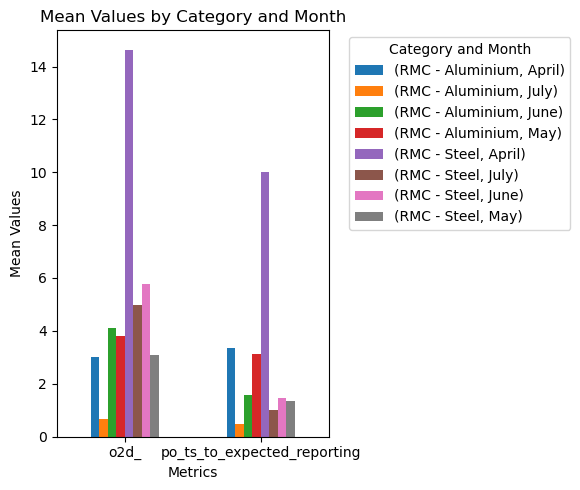

In [194]:
grouped_df = df.groupby(['category', 'Month'])[['o2d_', 'po_ts_to_expected_reporting']].mean().T

# Plotting the barplot
grouped_df.plot(kind='bar', figsize=(6, 5))
plt.title('Mean Values by Category and Month')
plt.ylabel('Mean Values')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.legend(title='Category and Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

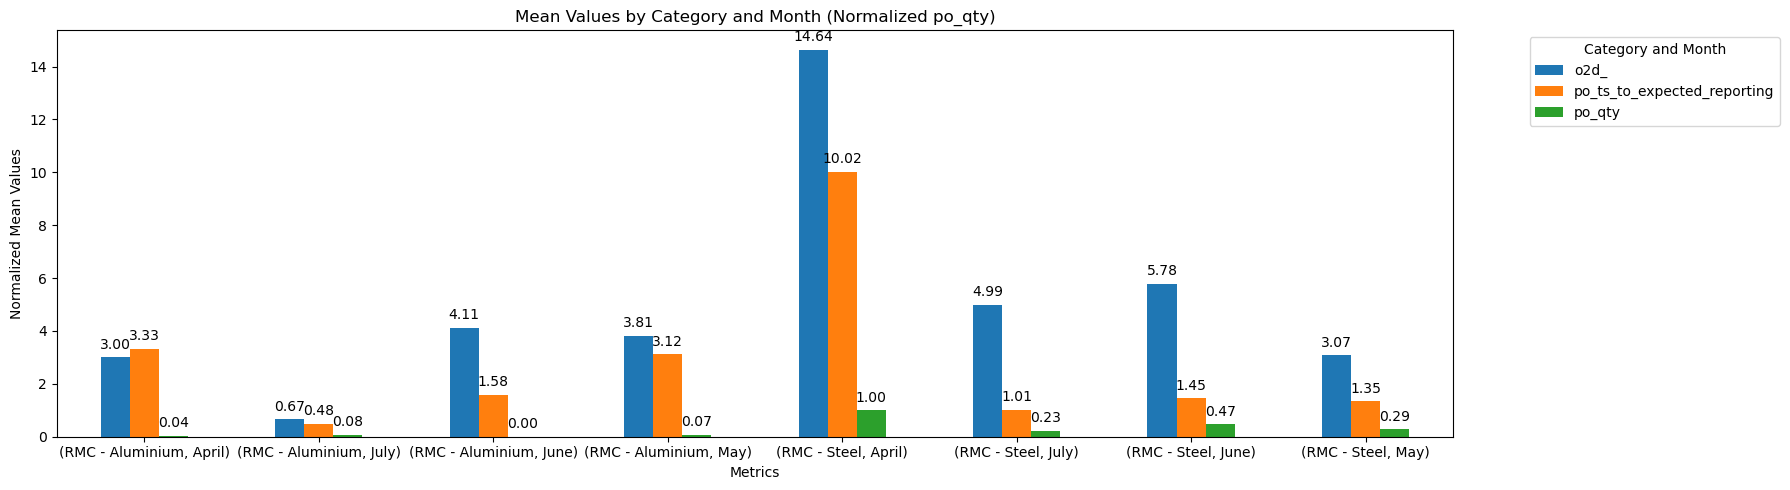

In [195]:
from sklearn.preprocessing import MinMaxScaler
grouped_df = df.groupby(['category', 'Month'])[['o2d_', 'po_ts_to_expected_reporting','po_qty']].mean().T
# Assuming grouped_df is already defined as per your grouping operation
# Normalize 'po_qty' using Min-Max scaling
scaler = MinMaxScaler()

grouped_df_normalized = grouped_df.copy()
grouped_df_normalized.loc['po_qty'] = scaler.fit_transform(grouped_df.loc['po_qty'].values.reshape(-1, 1)).flatten()

# Plotting the barplot
ax = grouped_df_normalized.T.plot(kind='bar', figsize=(18, 5))
plt.title('Mean Values by Category and Month (Normalized po_qty)')
plt.ylabel('Normalized Mean Values')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.legend(title='Category and Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Adding mean values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()


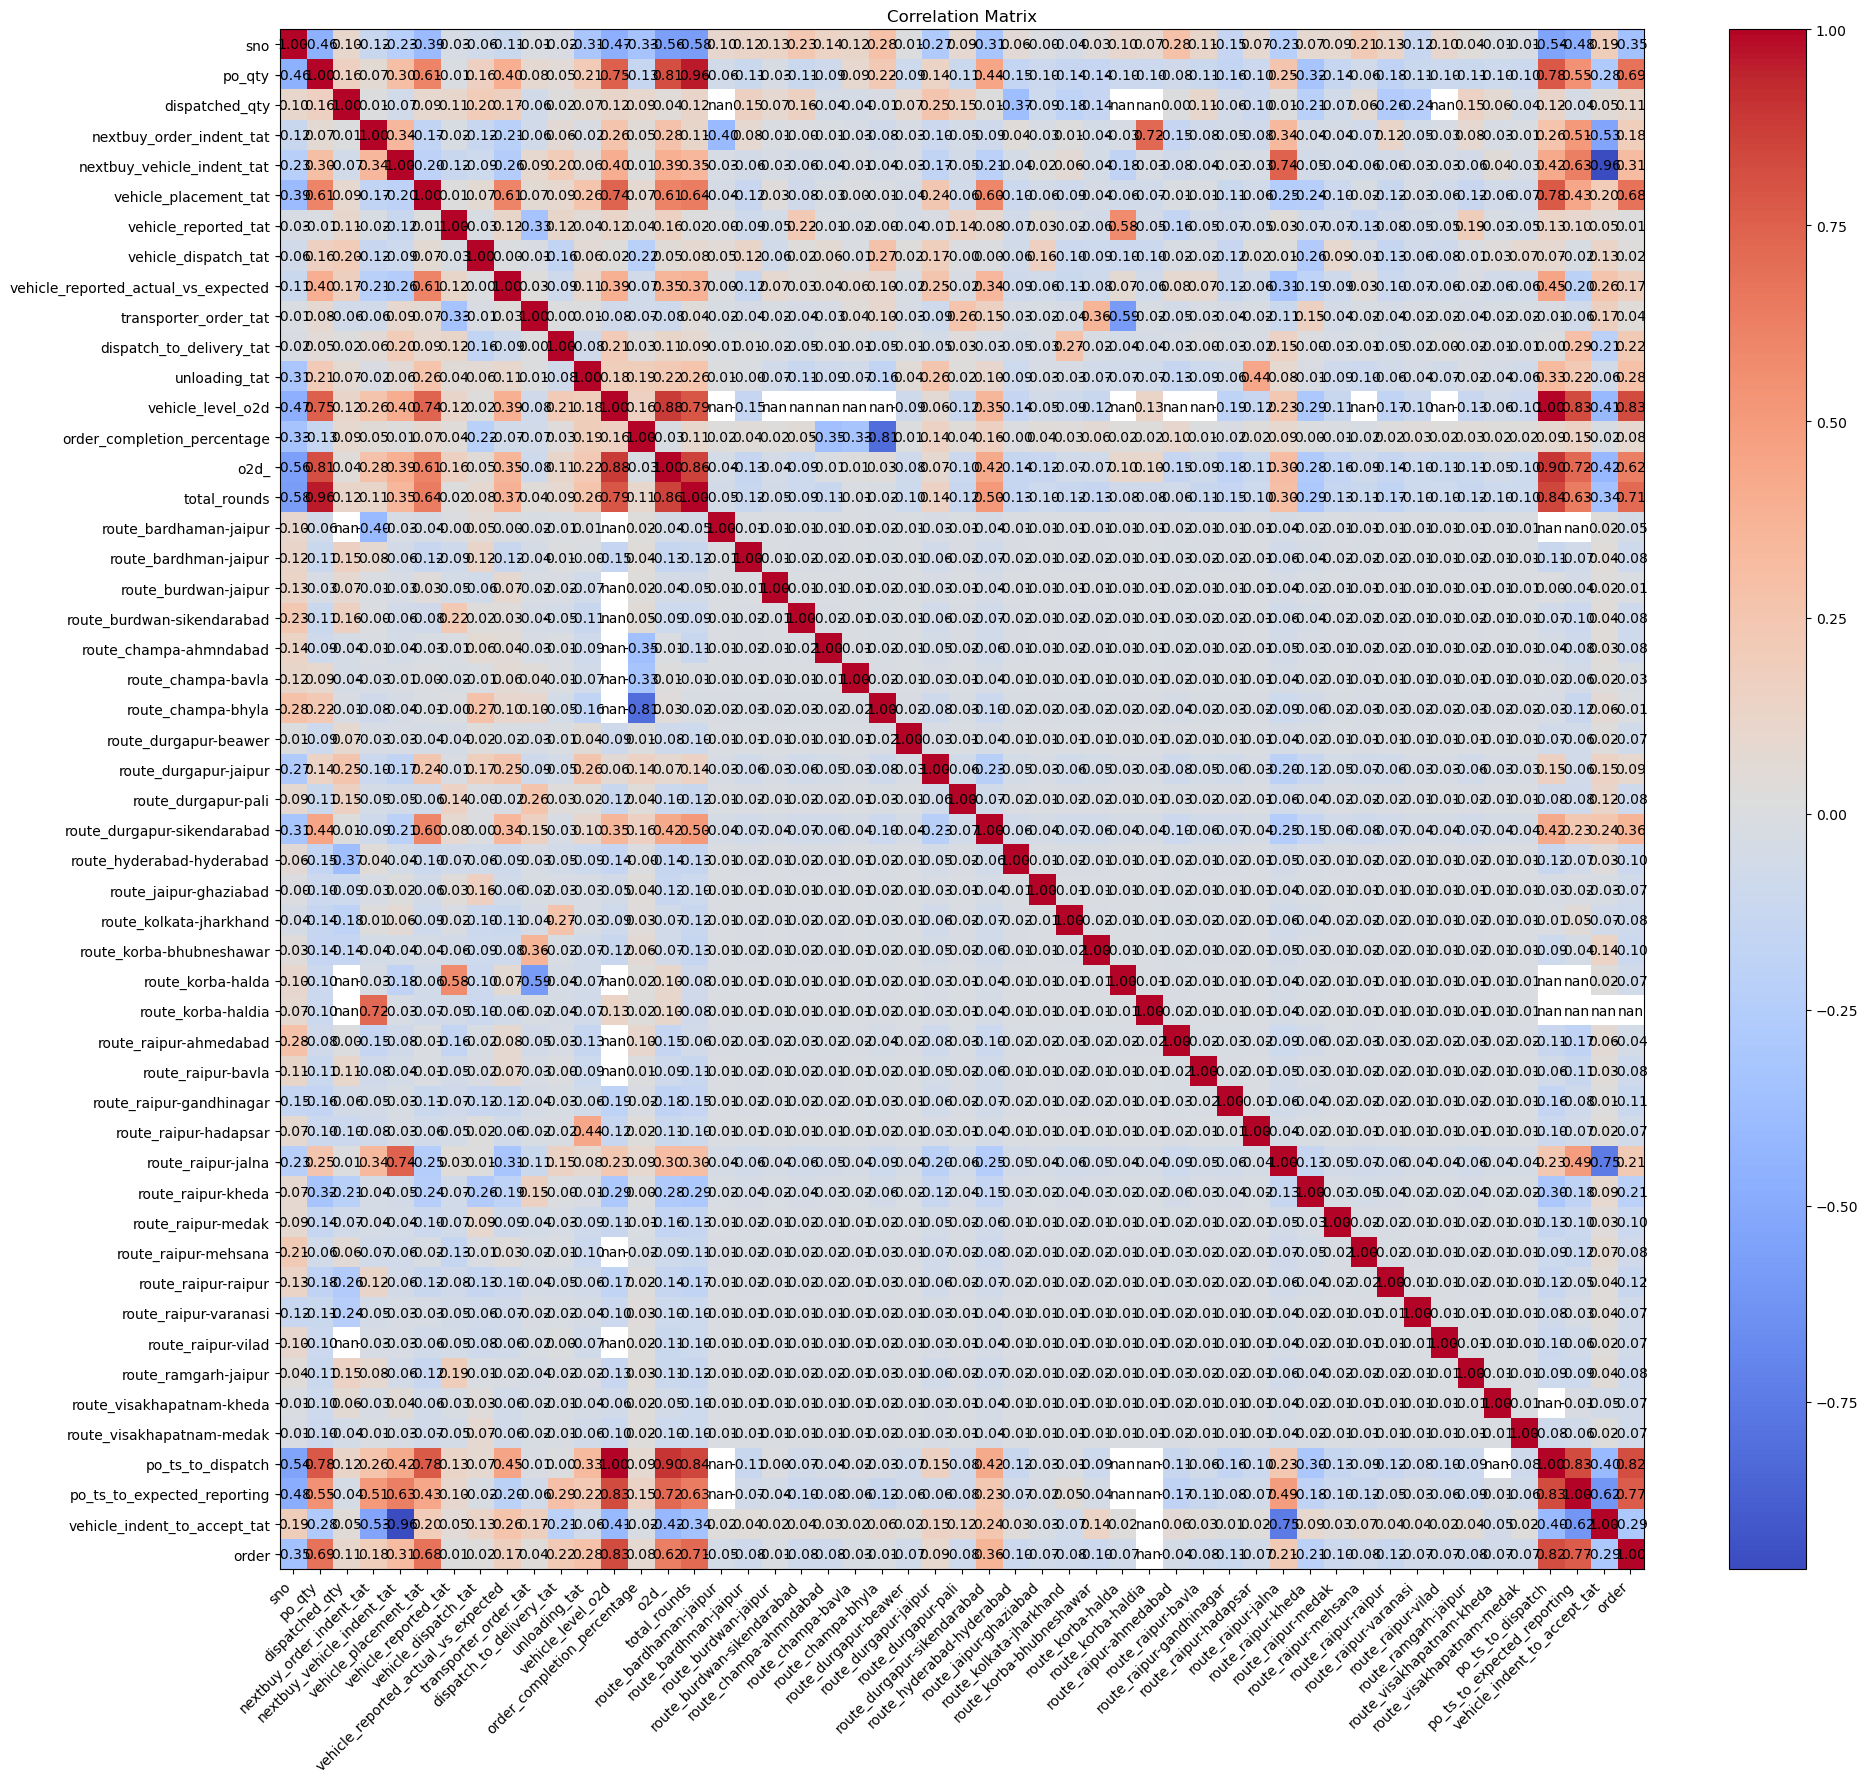

In [196]:
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plotting the heatmap with correlation values
plt.figure(figsize=(22, 20))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')

# Adding color bar
plt.colorbar(heatmap)

# Adding labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Adding correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix')
plt.show()

In [197]:
df.groupby(['category', 'Month'])[['o2d_', 'po_qty','nextbuy_order_indent_tat', 'nextbuy_vehicle_indent_tat', 'vehicle_indent_to_accept_tat']].mean().T


category                     RMC - Aluminium                                   \
Month                                  April       July       June        May   
o2d_                                2.996201   0.665051   4.113828   3.809377   
po_qty                             40.500000  59.000000  23.571429  55.454545   
nextbuy_order_indent_tat            0.672419   0.138331   2.105069   0.473427   
nextbuy_vehicle_indent_tat          0.517894   0.000012   0.144852   1.806430   
vehicle_indent_to_accept_tat       -0.194965   0.000000   0.469444  -1.181292   

category                     RMC - Steel                                      
Month                              April        July        June         May  
o2d_                           14.636520    4.991320    5.775536    3.074483  
po_qty                        470.312500  126.000000  231.306122  151.250000  
nextbuy_order_indent_tat        1.204942    0.790289    0.274462    0.761102  
nextbuy_vehicle_indent_tat      2.964519    0.000012    0.126641    0.000014  
vehicle_indent_to_accept_tat   -2.498029    0.029861    0.315575    0.032636

In [198]:
df.columns

Index(['sno', 'date', 'po_number', 'po_qty', 'seller_po_creation_date',
       'category', 'dispatched_qty', 'origin', 'destination', 'dispatch_week',
       'po_ts', 'nextbuy_order_indent_ts', 'nextbuy_vehicle_indent_ts',
       'transporter_order_indent_ts', 'transporter_order_indent_acceptance_ts',
       'vehicle_placement_ts', 'expected_date_of_vehicle_reporting',
       'vehicle_reported_ts', 'vehicle_loaded_ts', 'vehicle_dispatched_ts',
       'vehicle_reached_delivery_location_ts',
       'payment_confirmation_received_by_ops', 'vehicle_unloaded_ts',
       'nextbuy_order_indent_tat', 'nextbuy_vehicle_indent_tat',
       'vehicle_placement_tat', 'vehicle_reported_tat', 'vehicle_dispatch_tat',
       'vehicle_reported_actual_vs_expected', 'transporter_order_tat',
       'dispatch_to_delivery_tat', 'unloading_tat', 'vehicle_level_o2d',
       'buyer_name', 'seller_name', 'seller_po_number', 'transporter_type',
       'order_type', 'order_completion_percentage', 'o2d_', 'O2D_Bucke

In [200]:
# corr_df = df[['o2d_', 'po_qty','nextbuy_order_indent_tat', 'nextbuy_vehicle_indent_tat', 'vehicle_indent_to_accept_tat', 
#              'route_bardhaman-jaipur',
#        'route_bardhman-jaipur', 'route_champa-ahmndabad', 'route_champa-bhyla',
#        'route_durgapur-beawer', 'route_durgapur-jaipur', 'route_durgapur-pali',
#        'route_durgapur-sikendarabad', 'route_hyderabad-hyderabad',
#        'route_jaipur-ghaziabad', 'route_kolkata-jharkhand',
#        'route_korba-bhubneshawar', 'route_korba-halda', 'route_korba-haldia',
#        'route_raipur-gandhinagar', 'route_raipur-hadapsar',
#        'route_raipur-hyderabad', 'route_raipur-jalna', 'route_raipur-kheda',
#        'route_raipur-medak', 'route_raipur-mehsana', 'route_raipur-raipur',
#        'route_raipur-varanasi', 'route_ramgarh-jaipur',
#        'route_visakhapatnam-kheda', 'route_visakhapatnam-medak']]



# numeric_cols = corr_df.select_dtypes(include=['number']).columns

# # Calculate the correlation matrix
# correlation_matrix = df[numeric_cols].corr()

# # Plotting the heatmap with correlation values
# plt.figure(figsize=(22, 20))
# heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')

# # Adding color bar
# plt.colorbar(heatmap)

# # Adding labels
# plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
# plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# # Adding correlation values
# for i in range(len(correlation_matrix.columns)):
#     for j in range(len(correlation_matrix.index)):
#         plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# plt.title('Correlation Matrix')
# plt.show()


In [201]:
# df.pivot_table(index = ['route'], columns = ['Month', 'category'], 
#               aggfunc = {'o2d_':'mean', 'po_qty':'mean','nextbuy_order_indent_tat':'mean', 
#                          'nextbuy_vehicle_indent_tat':'mean', 'vehicle_indent_to_accept_tat':'mean'}).round(2)



In [202]:
df.pivot_table(index = ['route_raipur-hyderabad'], columns = ['category','Month'], aggfunc = {'nextbuy_order_indent_tat' : 'mean',
                                                                                      'o2d_' : 'mean',
                                                                                    'po_qty' : 'unique'}).round(2)



KeyError: 'route_raipur-hyderabad'

In [203]:
### Old route, but still so much TAT

In [204]:
june = df[df['Month'] == 'June']
non_june = df[~df['po_number'].isin(set(june['po_number']))]

only_june_route = list(set(june['route']) - set(non_june['route']))
june_df = df[df['route'].isin(only_june_route)]
non_june_df = df[~df['po_number'].isin(set(june_df['po_number']))]


In [205]:
numeric_cols = june_df.select_dtypes(include=[np.number]).columns
june_df[june_df[numeric_cols]<0] = 0
june_df.groupby('category')[['nextbuy_order_indent_tat', 'nextbuy_vehicle_indent_tat', 
                          'vehicle_indent_to_accept_tat', 'o2d_', 'po_qty']].mean()

/tmp/ipykernel_34448/2472969032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june_df[june_df[numeric_cols]<0] = 0
/tmp/ipykernel_34448/2472969032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june_df[june_df[numeric_cols]<0] = 0


,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_indent_to_accept_tat,o2d_,po_qty
category,,,,,
RMC - Aluminium,3.327861,0.007726,0.757118,4.466048,20.555556
RMC - Steel,0.449632,0.162131,0.281205,5.976134,234.000000


In [206]:
df4 = df[df['Month'] != 'April']
numeric_cols = june.select_dtypes(include=[np.number]).columns
df4[df4[numeric_cols]<0] = 0
df4.groupby(['category', 'Month'])[['nextbuy_order_indent_tat', 'nextbuy_vehicle_indent_tat', 
                          'vehicle_indent_to_accept_tat', 'o2d_', 'po_qty']].mean().T.round(2)

/tmp/ipykernel_34448/1208641234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[df4[numeric_cols]<0] = 0
/tmp/ipykernel_34448/1208641234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[df4[numeric_cols]<0] = 0


category                     RMC - Aluminium               RMC - Steel  \
Month                                   July   June    May        July   
nextbuy_order_indent_tat                0.14   2.21   0.47        0.79   
nextbuy_vehicle_indent_tat              0.00   0.14   1.81        0.00   
vehicle_indent_to_accept_tat            0.00   0.48   0.01        0.03   
o2d_                                    0.67   4.11   3.81        4.99   
po_qty                                 59.00  23.57  55.45      126.00   

category                                      
Month                           June     May  
nextbuy_order_indent_tat        0.40    0.76  
nextbuy_vehicle_indent_tat      0.13    0.00  
vehicle_indent_to_accept_tat    0.32    0.03  
o2d_                            5.78    3.07  
po_qty                        231.31  151.25

In [207]:
may = df[df['Month'] == 'May']
numeric_cols = may.select_dtypes(include=[np.number]).columns
may[may[numeric_cols]<0] = 0

may.groupby('category')[['nextbuy_order_indent_tat', 'nextbuy_vehicle_indent_tat', 
                          'vehicle_indent_to_accept_tat', 'o2d_', 'po_qty']].mean()

/tmp/ipykernel_34448/3574088448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may[may[numeric_cols]<0] = 0
/tmp/ipykernel_34448/3574088448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may[may[numeric_cols]<0] = 0


,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_indent_to_accept_tat,o2d_,po_qty
category,,,,,
RMC - Aluminium,0.473427,1.806430,0.012647,3.809377,55.454545
RMC - Steel,0.761102,0.000014,0.032636,3.074483,151.250000


In [208]:
df.pivot_table(index = ['Month', 'order_type'], columns = ['category'], aggfunc = {'nextbuy_order_indent_tat' : 'mean',
                                                                          'nextbuy_vehicle_indent_tat' : 'mean',
                                                                                      'o2d_' : 'mean',
                                                                                    'po_qty' : 'unique'}).round(2)



nextbuy_order_indent_tat              \
category                  RMC - Aluminium RMC - Steel   
Month order_type                                        
April S2B                            0.67        1.20   
July  S2B                            0.13        0.79   
      W2B                            0.14         NaN   
June  S2B                            3.32        0.27   
      W2B                            0.89         NaN   
May   S2B                            0.47        0.76   

                 nextbuy_vehicle_indent_tat                        o2d_  \
category                    RMC - Aluminium RMC - Steel RMC - Aluminium   
Month order_type                                                          
April S2B                              0.52        2.96            3.00   
July  S2B                              0.00        0.00            1.00   
      W2B                              0.00         NaN            0.58   
June  S2B                              0.01        0.13            5.17   
      W2B                              0.28         NaN            3.06   
May   S2B                              1.81        0.00            3.81   

                                                      po_qty  \
category         RMC - Steel                 RMC - Aluminium   
Month order_type                                               
April S2B              14.64              [12.0, 30.0, 60.0]   
July  S2B               4.99                          [30.0]   
      W2B                NaN                    [80.0, 25.0]   
June  S2B               5.78        [30.0, 20.0, 10.0, 25.0]   
      W2B                NaN              [30.0, 25.0, 10.0]   
May   S2B               3.07  [30.0, 75.0, 40.0, 50.0, 25.0]   

                                                             
category                                        RMC - Steel  
Month order_type                                             
April S2B                             [600.0, 300.0, 500.0]  
July  S2B                                           [126.0]  
      W2B                                               NaN  
June  S2B         [126.0, 300.0, 84.0, 200.0, 210.0, 500.0]  
      W2B                                               NaN  
May   S2B                               [200.0, 84.0, 42.0]

In [209]:
mean_o2d = df.groupby('po_number')['o2d_'].mean().reset_index()

good_po = df[df['o2d_']<=6]['po_number']
bad_po = df[df['o2d_']>6]['po_number']


good_df = df[df['po_number'].isin(good_po)]
bad_df = df[df['po_number'].isin(bad_po)]

In [210]:
numeric_cols = good_df.select_dtypes(include=[np.number]).columns
good_df[good_df[numeric_cols]<0] = 0
good_df.groupby('category')[['nextbuy_order_indent_tat', 'nextbuy_vehicle_indent_tat', 
                          'vehicle_indent_to_accept_tat', 'o2d_', 'po_qty']].mean().T

/tmp/ipykernel_34448/336582594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df[good_df[numeric_cols]<0] = 0
/tmp/ipykernel_34448/336582594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df[good_df[numeric_cols]<0] = 0


category,RMC - Aluminium,RMC - Steel
nextbuy_order_indent_tat,0.388791,0.521373
nextbuy_vehicle_indent_tat,0.562214,0.017087
vehicle_indent_to_accept_tat,0.164335,0.288777
o2d_,2.301625,4.596986
po_qty,38.821429,182.560000


In [211]:
numeric_cols = bad_df.select_dtypes(include=[np.number]).columns
bad_df[bad_df[numeric_cols]<0] = 0
bad_df.groupby('category')[['nextbuy_order_indent_tat', 'nextbuy_vehicle_indent_tat', 
                          'vehicle_indent_to_accept_tat', 'o2d_', 'po_qty']].mean().T

/tmp/ipykernel_34448/854502704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_df[bad_df[numeric_cols]<0] = 0
/tmp/ipykernel_34448/854502704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_df[bad_df[numeric_cols]<0] = 0


category,RMC - Aluminium,RMC - Steel
nextbuy_order_indent_tat,4.165308,1.046071
nextbuy_vehicle_indent_tat,1.175471,2.600845
vehicle_indent_to_accept_tat,0.508603,0.248459
o2d_,9.480185,13.806911
po_qty,47.857143,453.600000


In [212]:
june = df[df['Month'] == 'June']
may = df[df['Month'] == 'May']
april = df[df['Month'] == 'April']


In [213]:
pd.crosstab(columns = df['Month'], index = ['route'] )

Month,April,July,June,May
row_0,,,,
route,68,8,63,19


In [214]:
len(set(may['route']) - set(april['route']))

5

In [215]:
len(set(april['route']))

6

In [216]:
len(set(june['route']) - set(may['route']) - set(april['route']))

16

In [218]:
df.pivot_table(index = ['route'], columns = ['category'], aggfunc = {'po_qty' : 'mean', 'o2d_' : 'mean'}).round(2)

o2d_                      po_qty            
category              RMC - Aluminium RMC - Steel RMC - Aluminium RMC - Steel
route                                                                        
bardhaman-jaipur                  NaN        5.66             NaN      126.00
bardhman-jaipur                   NaN        3.33             NaN      126.00
burdwan-jaipur                    NaN        5.66             NaN      200.00
burdwan-sikendarabad              NaN        4.99             NaN      126.00
champa-ahmndabad                  NaN        8.40             NaN      126.00
champa-bavla                      NaN        9.57             NaN      500.00
champa-bhyla                      NaN        9.57             NaN      500.00
durgapur-beawer                   NaN        3.00             NaN       42.00
durgapur-jaipur                   NaN        9.66             NaN      343.52
durgapur-pali                     NaN        4.67             NaN      126.00
durgapur-sikendarabad             NaN       13.10             NaN      445.71
hyderabad-hyderabad              2.00         NaN           10.00         NaN
jaipur-ghaziabad                 0.00         NaN           25.00         NaN
kolkata-jharkhand                6.06         NaN           75.00         NaN
korba-bhubneshawar               5.10         NaN           25.00         NaN
korba-halda                     16.00         NaN           25.00         NaN
korba-haldia                    16.00         NaN           25.00         NaN
raipur-ahmedabad                  NaN        4.49             NaN      200.00
raipur-bavla                      NaN        4.49             NaN       84.00
raipur-gandhinagar               1.66         NaN           53.33         NaN
raipur-hadapsar                  1.00         NaN           25.00         NaN
raipur-jalna                      NaN       12.28             NaN      384.83
raipur-kheda                     3.29         NaN           52.92         NaN
raipur-medak                     1.00         NaN           30.00         NaN
raipur-mehsana                    NaN        5.72             NaN      200.00
raipur-raipur                    3.00         NaN           21.67         NaN
raipur-varanasi                  2.00         NaN           12.00         NaN
raipur-vilad                     1.00         NaN           25.00         NaN
ramgarh-jaipur                    NaN        4.33             NaN      126.00
visakhapatnam-kheda              5.00         NaN           40.00         NaN
visakhapatnam-medak              2.00         NaN           30.00         NaN